In [2]:
import numpy as np
from matplotlib import pyplot as plt

### FIRST METHOD

This method uses the gaussian lens equation to find where the focal points are, and then uses trigonometry to find the spot size on the camera ($g_4$)

$ \frac{1}{S_{object}} + \frac{1}{S_{image}} = \frac{1}{f}$

$ g = \tan{\theta} \times S $

In [3]:
fo = 152.4 #mm. focal length of collection parabola. Suppose it is analogous to an objective lens.
fe = 152.4 #mm. focal length of focusing parabola. Suppose it is analogous to an eyepeice.
L = 1996 #mm. path between two parabolas
g0 = 38.1 #mm. Half the diameter of the 3 inch collection parabola.
d = 185 #mm. distance between focusing parabola and the camera.

s0 = np.linspace(152.4 , 152.4 +4, 1000)

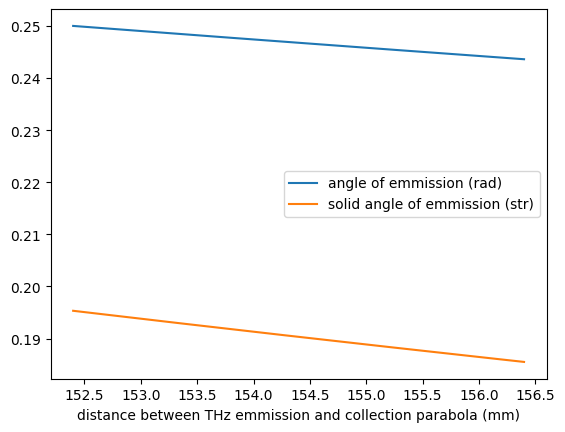

In [4]:
theta0 = g0 / np.abs(s0)
omega0 = 2*np.pi*(1-np.cos(theta0))

plt.plot(s0, theta0, label= "angle of emmission (rad)")
plt.plot(s0, omega0, label= "solid angle of emmission (str)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.legend()
plt.show()


C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\261012369.py:1: RuntimeWarning: divide by zero encountered in divide
  s1 = fo*s0 / (s0 -fo)


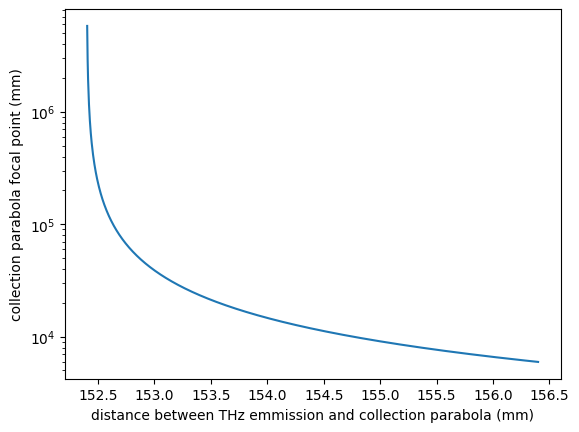

In [5]:
s1 = fo*s0 / (s0 -fo)

plt.plot(s0, s1)
plt.yscale("log")
plt.ylabel("collection parabola focal point (mm)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.show()

C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\2360184623.py:2: RuntimeWarning: invalid value encountered in divide
  s3 = fe*s2 / (s2 -fe)


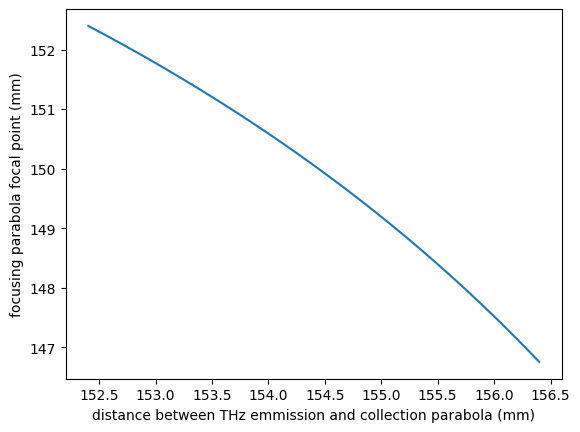

In [6]:
s2 = L -s1
s3 = fe*s2 / (s2 -fe)

plt.plot(s0, s3)
plt.ylabel("focusing parabola focal point (mm)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.show()

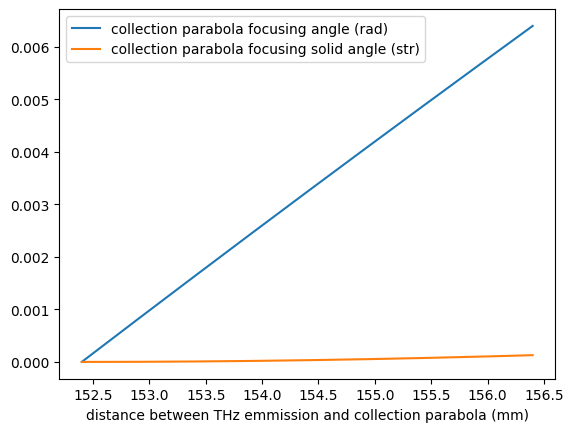

In [7]:
g1 = g0
theta1 = np.arctan(g1/s1)
omega1 = 2*np.pi*(1-np.cos(theta1)) *np.sign(theta1)

plt.plot(s0, theta1, label= "collection parabola focusing angle (rad)")
plt.plot(s0, omega1, label= "collection parabola focusing solid angle (str)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.legend()
plt.show()

C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\1085378886.py:2: RuntimeWarning: invalid value encountered in multiply
  g2 = np.tan(theta2) *s2


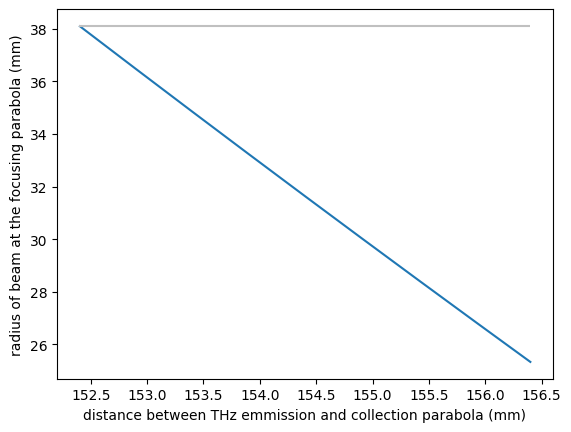

In [8]:
theta2 = -theta1
g2 = np.tan(theta2) *s2

plt.plot(s0, g2)
plt.ylabel("radius of beam at the focusing parabola (mm)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.hlines(38.1, np.min(s0), np.max(s0), colors= "silver", label= "radius of focusing parabola")
plt.show()

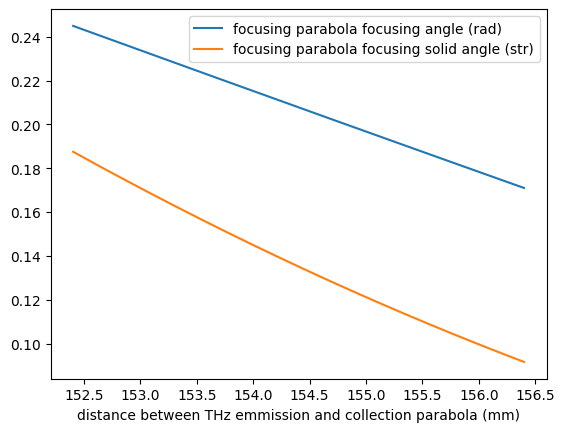

In [9]:
g3 = g2
theta3 = np.arctan(g3/s3)
omega3 = 2*np.pi*(1-np.cos(theta3)) *np.sign(theta3)

plt.plot(s0, theta3, label= "focusing parabola focusing angle (rad)")
plt.plot(s0, omega3, label= "focusing parabola focusing solid angle (str)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.legend()
plt.show()

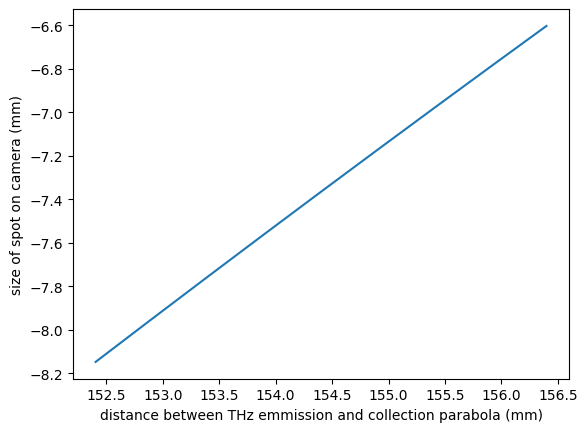

In [10]:
theta4 = -theta3
g4 = np.tan(theta4) *(d -s3)

plt.plot(s0, g4)
plt.ylabel("size of spot on camera (mm)")
plt.xlabel("distance between THz emmission and collection parabola (mm)")
plt.show()

### Second Method

This method uses the linear and angular magnification equations to find the spot size on the camera. It also relies on the same bit of trig from eariler.

$ M = \frac{\theta_{image}}{\theta_{object}} $

$ M = -\frac{S_{image}}{S_{object}} $

$ g = \tan{\theta} \times S $

In [11]:
L0 = np.linspace(152.4 , 152.4 +4, 1000) #mm. distance between the emmission point and the collection parabola.

f = [152.4, 152.4] #mm. focal lengths of [the collection parabola, the focusing parabola, the camera array]
L = [L0, 1996, 185] #mm. distances between [the emmission point and the collection parabola, the collection parabola and the focusing parabola, the focusing parabola and the camera]

fgen = (fn for fn in f)
Lgen = (Ln for Ln in L)

M = [0] # initialise with a magnification of zero. (imagine we wanted to make a point source with a lens. By reducing the focal point to zero then we can get perfectly diverging light from an infinately small image.)
S = [0] # initialise with a objective distance of zero.

while True:
    try:
        S += [next(Lgen) +M[-1]*S[-1]]
    except StopIteration:
        break

    try:
        M += [-1 / (S[-1]/next(fgen) -1)]
    except StopIteration:
        break

M = M[1:]
S = S[1:]

C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\3861487857.py:19: RuntimeWarning: divide by zero encountered in divide
  M += [-1 / (S[-1]/next(fgen) -1)]
C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\3861487857.py:14: RuntimeWarning: invalid value encountered in multiply
  S += [next(Lgen) +M[-1]*S[-1]]


In [12]:
size_of_parabola = 38.1 #mm. Half the diameter of the 3 inch collection parabola.

size_of_spot = size_of_parabola/L0 * 1/np.product(M, axis= 0) * (S[-1])

C:\Users\syf83691\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\665929077.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


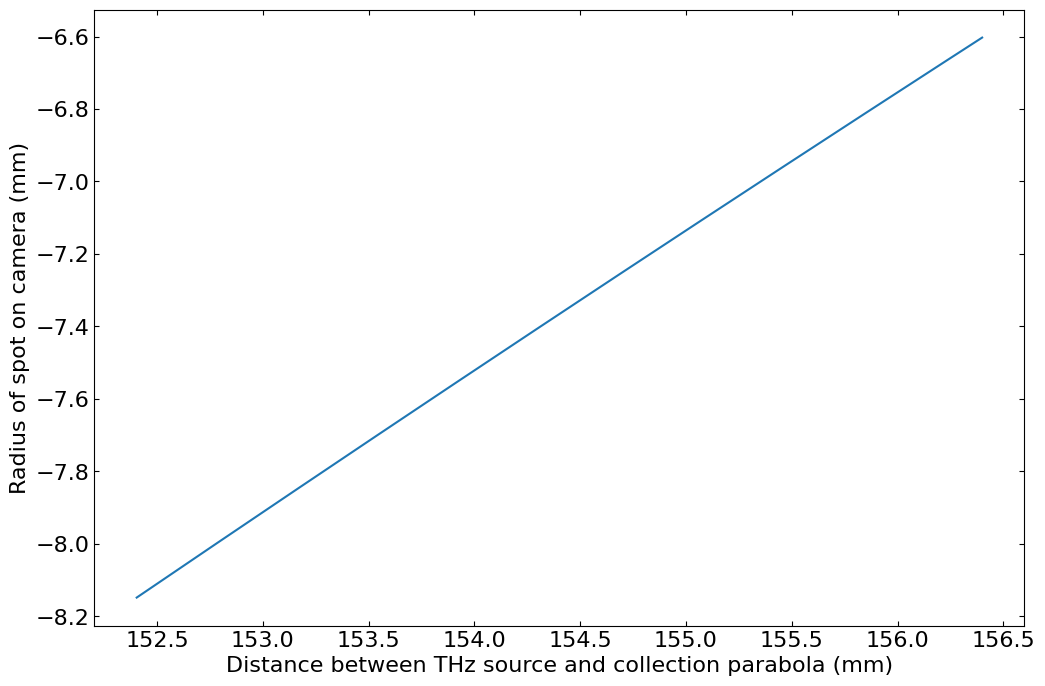

In [13]:
plt.rcParams.update({"image.cmap": 'Greys_r', 'xtick.direction': 'in', 'ytick.direction': 'in', 'xtick.top': True, 'ytick.right': True, "font.size": 16})

fig, axs = plt.subplots(1, 1, figsize= (12, 8))

axs.plot(L0, size_of_spot)
#axs.plot(s0, g4)
axs.set(xlabel= "Distance between THz source and collection parabola (mm)", ylabel= "Radius of spot on camera (mm)")
fig.show()

C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\5021329.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


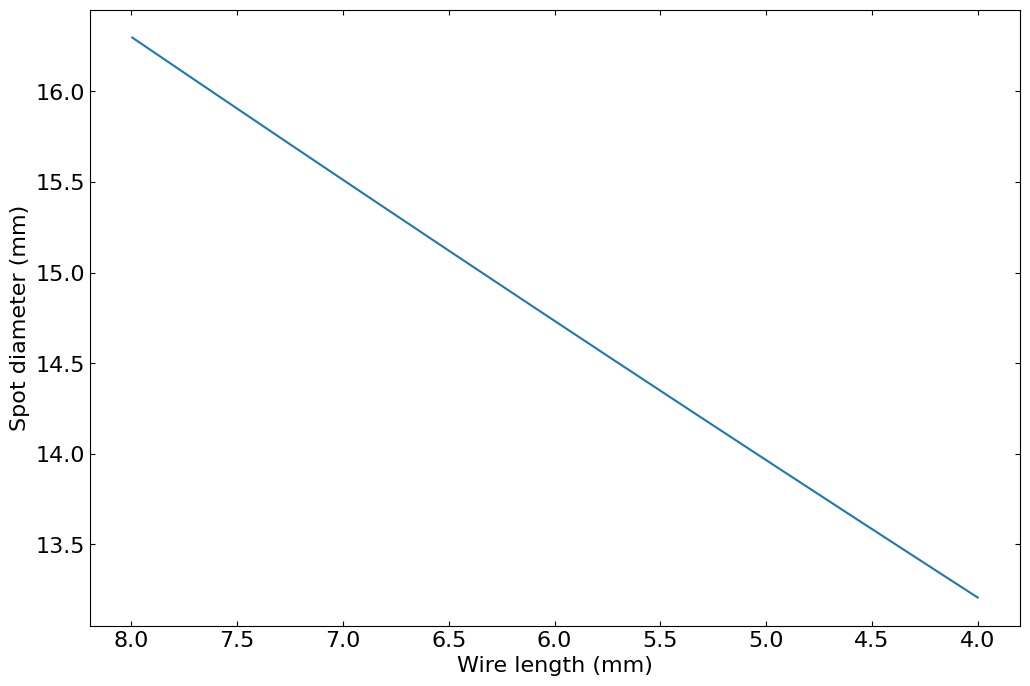

In [14]:
fig, axs = plt.subplots(1, 1, figsize= (12, 8))

axs.plot(160.4 -L0, 2*np.abs(size_of_spot))
axs.set(xlabel= "Wire length (mm)", ylabel= "Spot diameter (mm)")
axs.invert_xaxis()
fig.show()

# ----------------------------------------------

In [15]:
parabola_diameter = 76.2 #mm
distance_to_parabola = np.linspace(152.4, 156.4, 1000)

parabola_radius = parabola_diameter/2
emission_angle = np.arctan(parabola_radius/distance_to_parabola)
emission_solid_angle = 2*np.pi*(1-np.cos(emission_angle)) *np.sign(emission_angle)

C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\3085189320.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


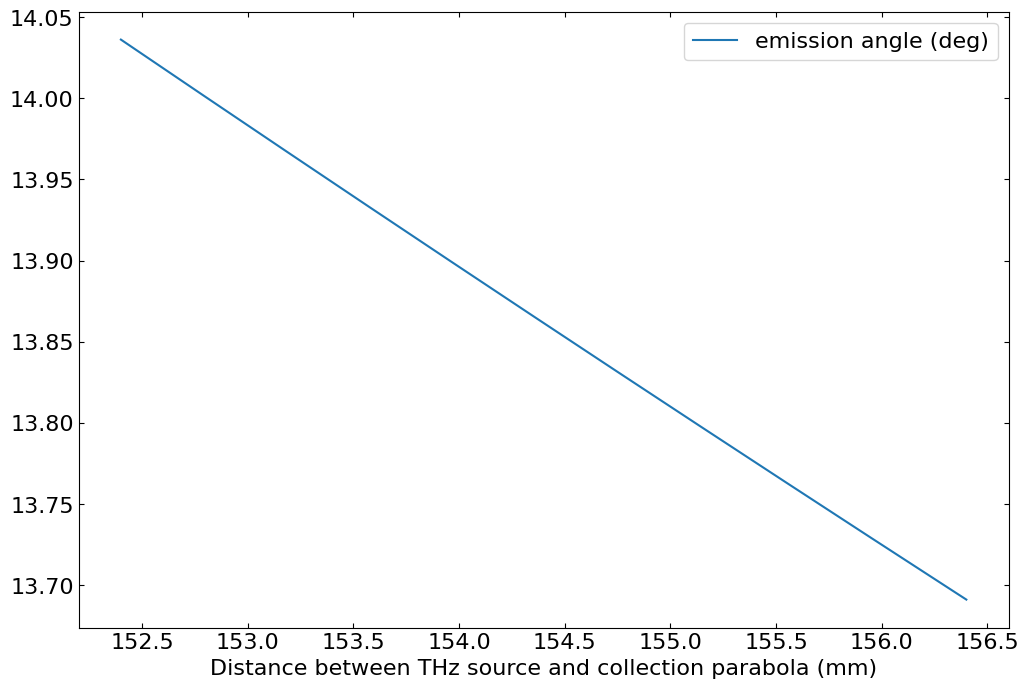

In [18]:
fig, axs = plt.subplots(1, 1, figsize= (12, 8))

axs.plot(distance_to_parabola, np.rad2deg(emission_angle), label= "emission angle (deg)")
#axs.plot(distance_to_parabola, emission_solid_angle, label= "emission solid angle (str)")
axs.set(xlabel= "Distance between THz source and collection parabola (mm)")
axs.legend()
fig.show()

C:\Users\syf83691\AppData\Local\Temp\ipykernel_12512\79246932.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


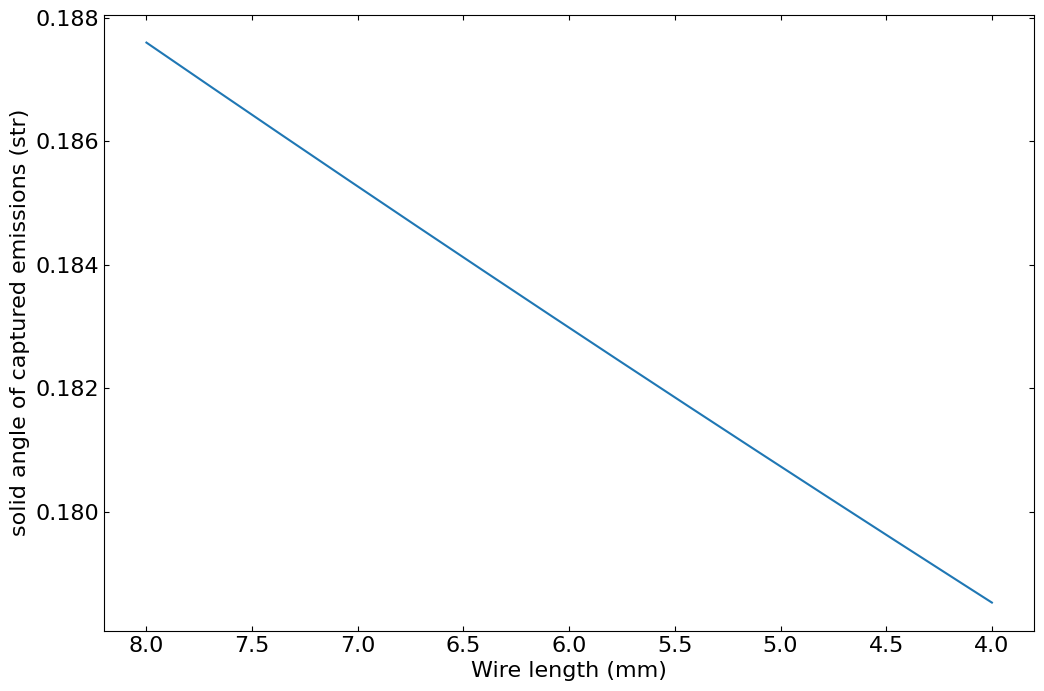

In [17]:
fig, axs = plt.subplots(1, 1, figsize= (12, 8))

axs.plot(160.4-distance_to_parabola, emission_solid_angle)
axs.set(xlabel= "Wire length (mm)", ylabel= "solid angle of captured emissions (str)")
axs.invert_xaxis()
fig.show()